In [1]:
#Import + Load Dataset

In [ ]:
# SECTION 1: Import Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor

from google.colab import files

# Upload Dataset
uploaded = files.upload()  # Select the house price CSV
filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)

df.head()


Saving Housing.csv to Housing.csv


,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


#Basic Exploration

In [3]:
df.info()
df.describe()
print(df.isnull().sum())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB
price               0
area                0
bedrooms            0
bathrooms           0
stories             0
mainroad            0
guestroom           0


#Feature Encoding & Split

In [4]:
# Target variable
y = df['price']

# Feature variables
X = df.drop(columns=['price'])

# Separate Numerical and Categorical Features
num_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
cat_features = X.select_dtypes(include=['object']).columns.tolist()

print("Numeric:", num_features)
print("Categorical:", cat_features)

# Preprocessing pipeline
numeric_transformer = StandardScaler()
categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, num_features),
        ('cat', categorical_transformer, cat_features)
    ])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


Numeric: ['area', 'bedrooms', 'bathrooms', 'stories', 'parking']
Categorical: ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea', 'furnishingstatus']


#Train Model — Linear Regression

In [5]:
lin_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', LinearRegression())
])

lin_model.fit(X_train, y_train)
y_pred_lin = lin_model.predict(X_test)

rmse_lin = np.sqrt(mean_squared_error(y_test, y_pred_lin))
mae_lin = mean_absolute_error(y_test, y_pred_lin)
r2_lin = r2_score(y_test, y_pred_lin)

print("🔹 Linear Regression Results:")
print("RMSE:", rmse_lin)
print("MAE:", mae_lin)
print("R2 Score:", r2_lin)


🔹 Linear Regression Results:
RMSE: 1324506.9600914402
MAE: 970043.4039201644
R2 Score: 0.6529242642153175


#Train Model — Random Forest

In [6]:
rf_model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', RandomForestRegressor(n_estimators=300, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print("🔹 Random Forest Results:")
print("RMSE:", rmse_rf)
print("MAE:", mae_rf)
print("R2 Score:", r2_rf)


🔹 Random Forest Results:
RMSE: 1389548.3020038765
MAE: 1012762.7518348622
R2 Score: 0.6180002671854373


#Visualizations

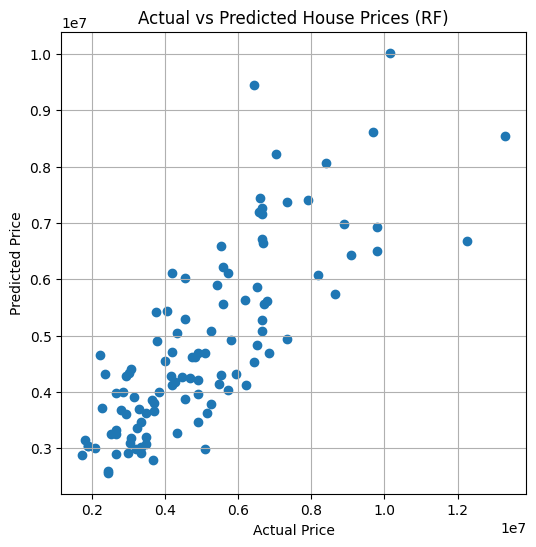

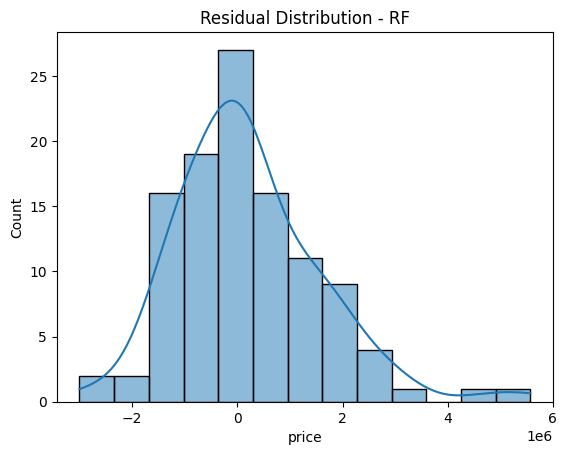

In [7]:
# Actual vs Predicted - Random Forest
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred_rf)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices (RF)")
plt.grid()
plt.show()

# Distribution of Residuals
residuals = y_test - y_pred_rf
sns.histplot(residuals, kde=True)
plt.title("Residual Distribution - RF")
plt.show()
